<a href="https://colab.research.google.com/github/rzkirahma/kmeans_cluster/blob/main/Klasterisasi_Kab_Kota_Jawa_Tengah_2022_Berdasarkan_Indikator_Kemiskinan_Menggunakan_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.cluster import KMeans

Import Dataset

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
df = "/content/drive/MyDrive/Indikator Kemiskinan Jateng 2022.xlsx" 
data = pd.read_excel(df)
data.head(34)

,Unnamed: 0,Garis Kemiskinan (Rp/kapita/bln)\t\t,Jumlah Penduduk Miskin (ribu jiwa),Persentase Penduduk Miskin (persen),Indeks Kedalaman Kemiskinan (P1) (Persen),Indeks Keparahan Kemiskinan (P2) (Persen),Tingkat Pengangguran Terbuka (TPT) (Persen)
0,Kabupaten Cilacap,384955.0,190.96,11.02,1.47,0.33,9.62
1,Kabupaten Banyumas,441520.0,220.47,12.84,1.75,0.35,6.05
2,Kabupaten Purbalingga,407849.0,145.33,15.30,2.08,0.48,5.23
3,Kabupaten Banjarnegara,351333.0,141.25,15.20,2.34,0.48,6.38
4,Kabupaten Kebumen,416004.0,196.16,16.41,3.41,1.02,5.92
5,Kabupaten Purworejo,393731.0,82.64,11.53,1.31,0.24,4.45
6,Kabupaten Wonosobo,399180.0,128.11,16.17,3.18,0.86,5.01
7,Kabupaten Magelang,377497.0,145.33,11.09,1.66,0.41,4.97
8,Kabupaten Boyolali,383030.0,97.18,9.82,1.13,0.20,4.92
9,Kabupaten Klaten,458872.0,144.87,12.33,1.86,0.44,4.31


Rename Kolom Data

In [92]:
# Rename kolom Kabupaten
data.rename(columns={data.columns[0]: 'Kab/Kota'},inplace=True)

# Rename kolom Garis Kemiskinan
data.rename(columns={data.columns[1]: 'Garis_Kemiskinan'},inplace=True)

# Rename kolom Jumlah Penduduk Miskin
data.rename(columns={data.columns[2]: 'Jumlah_Penduduk_Miskin'},inplace=True)

# Rename kolom Persentase Penduduk Miskin
data.rename(columns={data.columns[3]: 'Persentase_Penduduk_Miskin'},inplace=True)

# Rename kolom Kedalaman Kemiskinan
data.rename(columns={data.columns[4]: 'Kedalaman_Kemiskinan'},inplace=True)

# Rename kolom Keparahan Kemiskinan
data.rename(columns={data.columns[5]: 'Keparahan_Kemiskinan'},inplace=True)

# Rename kolom Pengangguran Terbuka
data.rename(columns={data.columns[6]: 'TPT'},inplace=True)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kab/Kota                    35 non-null     object 
 1   Garis_Kemiskinan            35 non-null     float64
 2   Jumlah_Penduduk_Miskin      35 non-null     float64
 3   Persentase_Penduduk_Miskin  35 non-null     float64
 4   Kedalaman_Kemiskinan        35 non-null     float64
 5   Keparahan_Kemiskinan        35 non-null     float64
 6   TPT                         35 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.0+ KB


Mengecek Missing Value

In [94]:
data.isnull().sum()

Kab/Kota                      0
Garis_Kemiskinan              0
Jumlah_Penduduk_Miskin        0
Persentase_Penduduk_Miskin    0
Kedalaman_Kemiskinan          0
Keparahan_Kemiskinan          0
TPT                           0
dtype: int64

Visualisasi

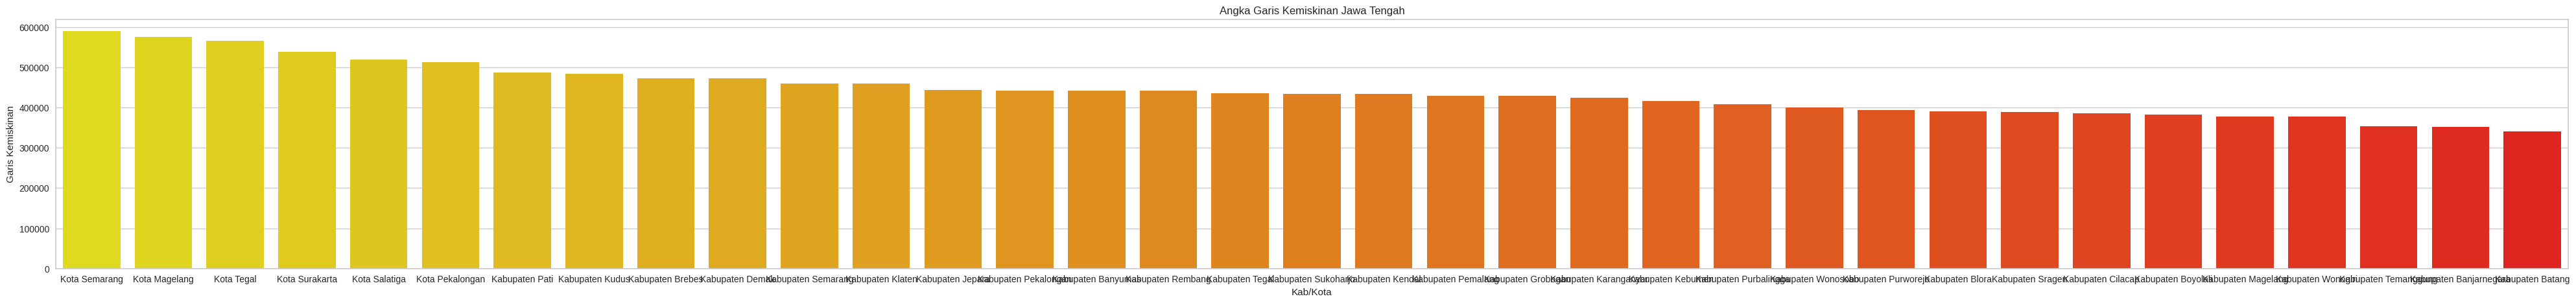

In [95]:
# Group the data by 'Kab/Kota' and calculate the sum of 'Garis_Kemiskinan'
description_sum = data.groupby('Kab/Kota').agg({'Garis_Kemiskinan': 'sum'}).reset_index()

# Mengurutkan data berdasarkan 'Garis_Kemiskinan'
description_sum = description_sum.sort_values(by='Garis_Kemiskinan', ascending=False)

# Plot Histogram
plt.figure(figsize=(50, 5))
sns.barplot(x='Kab/Kota', y='Garis_Kemiskinan', data=description_sum, palette='autumn_r')
plt.ylabel('Garis Kemiskinan')
plt.title('Angka Garis Kemiskinan Jawa Tengah')

# Display Grafik
plt.show()

Stat Summary

In [96]:
data.describe()

,Garis_Kemiskinan,Jumlah_Penduduk_Miskin,Persentase_Penduduk_Miskin,Kedalaman_Kemiskinan,Keparahan_Kemiskinan,TPT
count,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000
mean,441464.514286,109.47000,10.581714,1.563429,0.359714,5.345429
std,62940.228254,61.13864,3.273142,0.701137,0.204054,1.966043
min,341252.000000,8.65000,4.250000,0.470000,0.060000,1.760000
25%,392104.500000,75.82000,7.905000,1.065000,0.210000,4.355000
50%,434318.000000,97.18000,9.850000,1.470000,0.330000,5.010000
75%,472072.000000,143.94000,12.585000,1.905000,0.445000,6.505000
max,589598.000000,290.66000,16.410000,3.410000,1.020000,9.640000


Menentukan Jumlah Klaster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

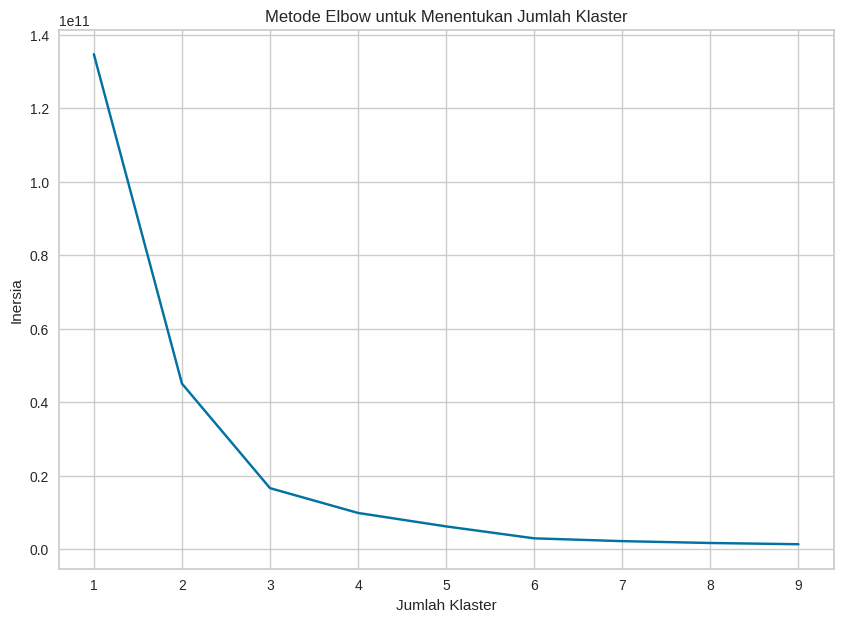

In [97]:
# Inisialisasi jumlah klaster yang akan diuji
k_values = range(1, 10)
inertia = []

# Melakukan klasterisasi dengan berbagai jumlah klaster
uji = data[['Garis_Kemiskinan', 'Jumlah_Penduduk_Miskin', 'Persentase_Penduduk_Miskin', 'Kedalaman_Kemiskinan', 'Keparahan_Kemiskinan', 'TPT']]
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(uji)
    inertia.append(kmeans.inertia_)

# Plot nilai inersia terhadap jumlah klaster
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
plt.show()

Dari hasil metode Elbow, didapatkan klaster yang terbentuk sebanyak 3

In [98]:
# Select the columns for clustering
uji = data[['Garis_Kemiskinan', 'Jumlah_Penduduk_Miskin', 'Persentase_Penduduk_Miskin', 'Kedalaman_Kemiskinan', 'Keparahan_Kemiskinan', 'TPT']]

# Build the K-means model
kmeans = KMeans(n_clusters=3)

# Perform clustering on the data
kmeans.fit(uji)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column to the DataFrame
data['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [99]:
data.head(35)

,Kab/Kota,Garis_Kemiskinan,Jumlah_Penduduk_Miskin,Persentase_Penduduk_Miskin,Kedalaman_Kemiskinan,Keparahan_Kemiskinan,TPT,Cluster
0,Kabupaten Cilacap,384955.0,190.96,11.02,1.47,0.33,9.62,2
1,Kabupaten Banyumas,441520.0,220.47,12.84,1.75,0.35,6.05,0
2,Kabupaten Purbalingga,407849.0,145.33,15.30,2.08,0.48,5.23,2
3,Kabupaten Banjarnegara,351333.0,141.25,15.20,2.34,0.48,6.38,2
4,Kabupaten Kebumen,416004.0,196.16,16.41,3.41,1.02,5.92,0
5,Kabupaten Purworejo,393731.0,82.64,11.53,1.31,0.24,4.45,2
6,Kabupaten Wonosobo,399180.0,128.11,16.17,3.18,0.86,5.01,2
7,Kabupaten Magelang,377497.0,145.33,11.09,1.66,0.41,4.97,2
8,Kabupaten Boyolali,383030.0,97.18,9.82,1.13,0.20,4.92,2
9,Kabupaten Klaten,458872.0,144.87,12.33,1.86,0.44,4.31,0


In [100]:
# Mengurutkan DataFrame berdasarkan 'Cluster'
sorted_data = data.sort_values(by='Cluster')
sorted_data

,Kab/Kota,Garis_Kemiskinan,Jumlah_Penduduk_Miskin,Persentase_Penduduk_Miskin,Kedalaman_Kemiskinan,Keparahan_Kemiskinan,TPT,Cluster
17,Kabupaten Pati,486855.0,118.04,9.33,1.20,0.25,4.45,0
18,Kabupaten Kudus,482806.0,66.06,7.41,0.90,0.19,3.21,0
21,Kabupaten Semarang,459151.0,78.60,7.27,1.03,0.22,4.81,0
16,Kabupaten Rembang,441482.0,94.56,14.65,2.41,0.59,1.76,0
23,Kabupaten Kendal,433864.0,93.03,9.48,1.52,0.39,7.34,0
14,Kabupaten Grobogan,428597.0,163.20,11.80,1.95,0.45,4.40,0
25,Kabupaten Pekalongan,441765.0,87.53,9.67,1.67,0.43,3.23,0
12,Kabupaten Karanganyar,424677.0,88.56,9.85,1.64,0.37,5.70,0
26,Kabupaten Pemalang,429549.0,195.84,15.06,2.43,0.57,6.63,0
19,Kabupaten Jepara,442618.0,89.08,6.88,1.22,0.30,4.10,0


Distribusi Klaster

<Axes: title={'center': 'Jumlah Kab/Kota berdasarkan Klaster'}>

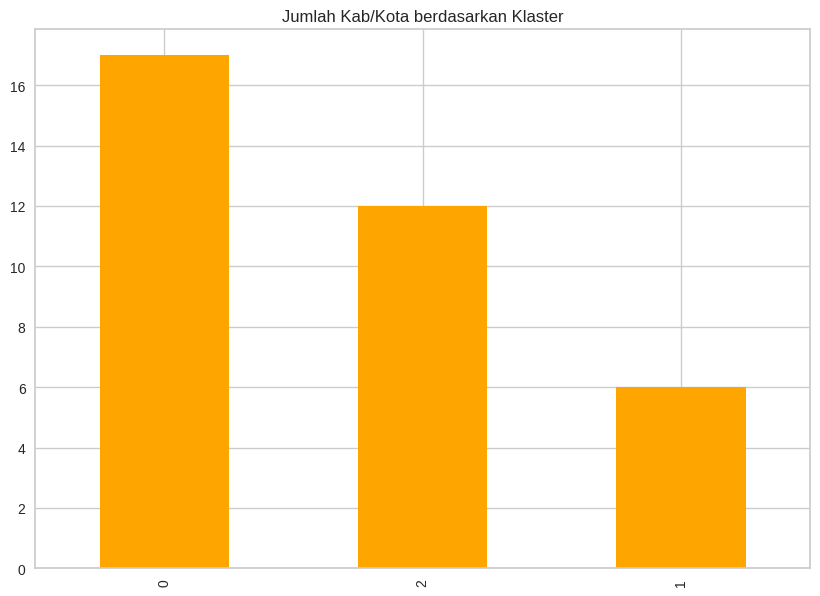

In [101]:
data['Cluster'].value_counts().plot(kind='bar', color = 'orange', title='Jumlah Kab/Kota berdasarkan Klaster')

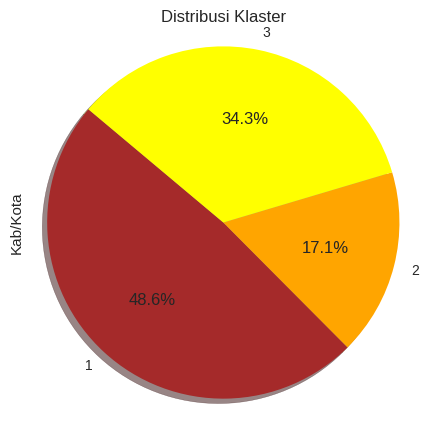

In [102]:
ax = data.groupby('Cluster')['Kab/Kota'].count().plot(
    kind='pie',
    figsize=(5, 5),
    colors = ['brown', 'orange','yellow'],
    labels = ['1','2','3'],
    explode = (0,0,0) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Distribusi Klaster')
plt.show()

**Kesimpulan**

Berdasarkan metode Elbow, klaster yang terbentuk untuk Kab/Kota di Jawa Tengah berdasarkan indikator kemiskinan adalah 3. 
Klaster 1 terdiri atas 6 Kab/Kota, Klaster 2 terdiri atas 17 Kab/Kota, dan Klaster 3 terdiri atas 12 Kab/Kota.

Klaster 1 (Tingkat Kemiskinan Rendah) : Kota Tegal, Kota Semarang, Kota Salatiga, Kota Surakarta, Kota Magelang, Kota Pekalongan. 

Klaster 2 (Tingkat Kemiskinan Sedang) : Kab Brebes, Kab Tegal, Kab Pemalang, Kab Pekalongan, Kab Kendal, Kab Semarang, Kab Demak, Kab Jepara, Kab Kudus, Kab Rembang, Kab Pati, Kab Grobogan, Kab Banyumas, Kab Karanganyar, Kab Sukoharjo, Kab Klaten, Kab Kebumen

Klaster 3 (Tingkat Kemiskinan Tinggi) : Kab Purbalingga, Kab Banjarnegara, Kab Purworejo, Kab Wonosobo, Kab Boyolali, Kab Blora, Kab Batang, Kab Temanggung, Kab Wonogiri, Kab Sragen, Kab Magelang, Kab Cilacap